In [1]:
from commonfunctions import *
import math

# Show the matlpotlib figures inside the notebook
%matplotlib inline

In [2]:
def eliminate_points_on_almost_straight_line(hull):
    if hull.shape[0] <= 4:
        return hull
    i = 0
    while i < hull.shape[0] and hull.shape[0] > 4:
        A1,B1,_ = line(hull[i - 1], hull[i])
        m1 = -A1 / B1
        A2,B2,_ = line(hull[i], hull[(i + 1) % hull.shape[0]])
        m2 = -A2 / B2
        # img_copy = np.copy(fixed1)
        # cv2.line(img_copy, tuple(hull[i - 1]), tuple(hull[i]), (125,125,125), 3, cv2.LINE_AA)
        # cv2.line(img_copy, tuple(hull[i]), tuple(hull[(i + 1) % hull.shape[0]]), (220,220,220), 3, cv2.LINE_AA)
        # cv2.imshow("ta", img_copy)
        # print((m2 - m1) / (1 + m1 * m2))
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        angle = 0
        if B1 == 0:
            angle = abs(1 / m2)
        elif B2 == 0:
            angle = abs(1 / m1)
        else:
            angle = abs((m2 - m1) / (1 + m1 * m2))
        if angle <= 0.5:
            hull = np.delete(hull, i, axis=0)
            i -= 1
        i += 1
    return hull

def approx_hull_to_rectangular_shape(hull):
    while hull.shape[0] > 4:
        min_pair = ()
        min_dist = math.inf
        for i in range(hull.shape[0]):
            p = hull[i], hull[(i + 1) % hull.shape[0]], i
            d = distance(p)
            if d < min_dist:
                min_pair = p
                min_dist = d
        p1, p2, i = min_pair
        # debug
        # img_copy = np.copy(fixed1)
        # for j in range(hull.shape[0]):
        #     cv2.circle(img_copy, (hull[j][0],hull[j][1]), 4, (0, 0, 255), -1)
        #     cv2.waitKey(0)
        #     cv2.imshow("ta", img_copy)
        # cv2.destroyAllWindows()
        # img_copy = np.copy(fixed1)
        # cv2.line(image, start_point, end_point, color, thickness) 
        # cv2.line(img_copy, (hull[i][0],hull[i][1]), 4, (0, 0, 255), -1)
        # cv2.waitKey(0)
        # cv2.imshow("ta", img_copy)
        #debug
        # m1,_,_ = line(hull[i - 1], p1)
        # m2,_,_ = line(p2, hull[(i + 2) % hull.shape[0]])
        # if abs((m2 - m1) / (1 + m1 * m2)) <= 0.01:
        #     i += 1
            # continue
        p_int = intersection(hull[i - 1], p1, p2, hull[(i + 2) % hull.shape[0]])
        hull[i] = p_int
        hull = np.delete(hull, [i, (i + 1) % hull.shape[0]], axis=0)
        if i > hull.shape[0]:
            hull = np.insert(hull, 0, p_int, axis=0)
            continue
        hull = np.insert(hull, i, p_int, axis=0)
    return hull

def fix_perspective(image, orgImg):
    # gray = cv2.GaussianBlur(image, (5, 5), 0)
    # edged = cv2.Canny(gray, 50, 100)
    edged = image
    # edged = cv2.dilate(edged, None, iterations=1)
    # edged = cv2.erode(edged, None, iterations=1)
    # #debug
    # cf.show_images([edged, gray])
    # #debug
    # cnts = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    # c = max(cnts, key = cv2.contourArea)
    asd = cv2.findNonZero(edged)
    print(asd)
    print(asd.shape)
    hull = cv2.convexHull(cv2.findNonZero(edged))[:, 0,:]
    # debug
    cpy = cv2.cvtColor(image.copy(),cv2.COLOR_GRAY2RGB)
    cv2.drawContours(cpy, [hull], 0, (0, 0, 255), 1)
    show_images([cpy])
    # debug
    hull = eliminate_points_on_almost_straight_line(hull)
    #debug
    print(hull.shape)
    cpy = cv2.cvtColor(image.copy(),cv2.COLOR_GRAY2RGB)
    cv2.drawContours(cpy, [hull], -1, (255, 0, 0), 2)
    show_images([cpy])
    #debug
    # img_copy = np.copy(fixed1)
    # for j in range(hull.shape[0]):
    #     cv2.circle(img_copy, (hull[j][0],hull[j][1]), 4, (0, 0, 255), -1)
    #     cv2.waitKey(0)
    #     cv2.imshow("ta", img_copy)
    rect = approx_hull_to_rectangular_shape(hull)

    return four_point_transform(orgImg, rect)
# def fix_perspective(image, orgImg):
#     gray = cv2.GaussianBlur(image, (5, 5), 0)
#     # edged = cv2.Canny(gray, 50, 100)
#     edged = gray
#     # edged = cv2.dilate(edged, None, iterations=1)
#     # edged = cv2.erode(edged, None, iterations=1)
#     # #debug
#     # cf.show_images([edged, gray])
#     # #debug
#     cnts = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
#     cnts = sorted(cnts, key = cv2.contourArea, reverse=True)
#     staffs = []
#     for i in range(len(cnts)):
#         if i != 0:
#             area1 = cv2.contourArea(cnts[i])
#             area2 = cv2.contourArea(cnts[i - 1])
#             if abs(area1 - area2) > 0.3 * area2:
#                 break
            
#         hull = cv2.convexHull(cnts[i])[:, 0,:]
#         # hull = cv2.approxPolyDP(hull, 0.01*cv2.arcLength(hull, True), True)[:, 0,:]
#         # debug
#         cpy = cv2.cvtColor(orgImg.copy(),cv2.COLOR_GRAY2RGB)
#         cv2.drawContours(cpy, [hull], 0, (0, 0, 255), 3)
#         show_images([cpy])
#         # debug
#         hull = eliminate_points_on_almost_straight_line(hull)
#         # #debug
#         # print(hull.shape)
#         # cpy = cv2.cvtColor(image.copy(),cv2.COLOR_GRAY2RGB)
#         # cv2.drawContours(cpy, [hull], -1, (255, 0, 0), 2)
#         # show_images([cpy])
#         # #debug
#         # img_copy = np.copy(fixed1)
#         # for j in range(hull.shape[0]):
#         #     cv2.circle(img_copy, (hull[j][0],hull[j][1]), 4, (0, 0, 255), -1)
#         #     cv2.waitKey(0)
#         #     cv2.imshow("ta", img_copy)
#         rect = approx_hull_to_rectangular_shape(hull)
#         staffs.append(four_point_transform(orgImg, rect))

#     return staffs

In [3]:
def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    # # debug
    # print(rect)
    # for x in rect:
    #     cv2.circle(image, tuple(x), 4, (0, 0, 255), -1)
    # # debug

    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([
        [20, 20],
        [maxWidth - 1, 20],
        [maxWidth - 1, maxHeight - 1],
        [20, maxHeight - 1]], dtype = "float32")
    
    M = cv2.getPerspectiveTransform(rect, dst)
    print((maxWidth, maxHeight))
    fixed = cv2.warpPerspective(image, M, (maxWidth + 40, maxHeight + 40))
    # return the fixed image
    return fixed

In [4]:
def order_points(pts):
    # sort the points based on their x-coordinates
    pts_indexes = np.argsort(pts[:, 0])
    xSorted = pts[pts_indexes, :]
    # now, sort the left-most coordinates according to their
    # y-coordinates so we can grab the top-left and bottom-left
    # points, respectively
    tl_index = 0
    if xSorted[0][1] < xSorted[1][1]:
        tl_index = pts_indexes[0]
    else:
        tl_index = pts_indexes[1]
    result = []
    for i in range(tl_index, tl_index + 4, 1):
        result.append(pts[i % 4])
    return np.array(result, dtype="float32")

In [5]:
def line(p1, p2):
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

def intersection(o1, p1, o2, p2):
    L1 = line(o1, p1)
    L2 = line(o2, p2)
    if abs(L1[0] - L2[0]) <= 0.01:
        return False
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = int(round(Dx / D))
        y = int(round(Dy / D))
        return [x, y]
    else:
        return False

def distance(p):
    p1, p2,_ = p
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [6]:
def line_one_point(image, start_point, degree, color, thickness):
    end_point = (int(round(start_point[0] + 4096 * math.cos(degree * np.pi / 180.0))), int(round(start_point[1] + 4096 * math.sin(degree * np.pi / 180.0))))
    print(end_point)
    cv2.line(image, start_point, end_point, color, thickness) 

In [7]:
def deskew(img, org):
    # edged = cv2.Canny(img, 50, 200, None, 3)
    edged = img
    linesP = cv2.HoughLinesP(edged, 1, np.pi / 180, min(img.shape[0], img.shape[1]) // 4, None, 0, 20)
    # if linesP is not None:
    #     for i in range(0, len(linesP)):
    #         l = linesP[i][0]
    #         cv2.line(img, (l[0], l[1]), (l[2], l[3]), (125,125,125), 3, cv2.LINE_AA)
    slopes = [(y2 - y1)/(x2 - x1) if (x2-x1) else math.inf for x1, y1, x2, y2 in linesP[:,0,:]]
    deg_angles = [round(np.degrees(np.arctan(x)), 2) for x in slopes]

    histo = np.histogram(deg_angles, bins=180)
    # bar(histo[1][:180].astype(np.uint8), histo[0][:180], width=0.8, align='center')
    # most frequent slope of all lines
    rotation_number = histo[1][np.argmax(histo[0])]
    print(rotation_number)
    rotated1 = rotate(img, rotation_number, resize=True)
    if rotated1.dtype != "uint8":
        rotated1 = (rotated1 * 255).astype("uint8")
    rotated2 = rotate(org, rotation_number, resize=True)
    if rotated2.dtype != "uint8":
        rotated2 = (rotated2 * 255).astype("uint8")
    # h, w = img.shape
    # rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), rotation_number, 1)
    # rotated = cv2.warpAffine(img, rotation_matrix, (w, h), flags=cv2.INTER_NEAREST, borderValue=(255,255,255))
    show_images([rotated1, rotated2], ["rotated1", "rotated2"])
    return (rotated1, rotated2)

In [8]:
def drawLinesOnly(img):
    # edged = cv2.Canny(img, 50, 200, None, 3)
    # el = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 50)
    linesP = cv2.HoughLinesP(img, 1, np.pi / 180, img.shape[1] // 8, None, 0, 20)
    slopes = [(y2 - y1)/(x2 - x1) if (x2-x1) else math.inf for x1, y1, x2, y2 in linesP[:,0,:]]
    deg_angles = [np.degrees(np.arctan(x)) for x in slopes]
    lines = np.column_stack((linesP[:,0,:], deg_angles))
    print(lines.shape)
    lines = lines[abs(lines[:,4]) < 30].astype("int")
    lines_img = np.zeros(img.shape, dtype="uint8")
    for x1, y1, x2, y2,_ in lines:
        cv2.line(lines_img, (x1, y1), (x2, y2), (255,255,255), 2, cv2.LINE_AA)

    # el = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 30))
    # lines_img = cv2.morphologyEx(lines_img, cv2.MORPH_CLOSE, el)
    # lines_img = cv2.morphologyEx(lines_img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10)))
    show_images([lines_img])
    return lines_img

In [9]:
def binraization(img,n=8,t=15):

    outputimg = np.zeros(img.shape)
    intimg = np.zeros(img.shape)
    h = img.shape[1]
    w = img.shape[0]
    s= min(w,h)//n
    count = s**2
    img = np.pad(img,s,"constant")
    intimg = np.cumsum(img ,axis =1)
    intimg = np.cumsum(intimg ,axis =0)
    a = np.roll(intimg,-s//2,axis =0)
    a = np.roll(a,-s//2,axis =1)
    a[:,-s//2:]=a[-s//2-1,-s//2-1]
    a[-s//2:,:]=a[-s//2-1,-s//2-1]
    b = np.roll(intimg,s//2+1,axis =0)
    b = np.roll(b,-s//2,axis =1)
    b[0:s//2+1,:]=0
    b[:,-s//2:]=0
    
    c = np.roll(intimg,s//2+1,axis =1)
    c = np.roll(c,-s//2,axis =0)
    c[:,0:s//2+1]=0
    c[-s//2:,:]=0
    
    d = np.roll(intimg,s//2+1,axis =0)
    d = np.roll(d,s//2+1,axis =1)
    d[0:s//2+1,:]=0
    d[:,0:s//2+1]=0

    sum = (a-b-c+d)*(100-t)/100
    outputimg = np.where(img>sum/count, 1, 0)
    return outputimg[s:-s,s:-s]

def segement_hand_written(img):
    h , w = img.shape 
    window , width = get_dimensions(w,h)
    fimg = median(img)
    glares = (fimg > 195)
    bimg = binraization(fimg,window,7)
    output = (bimg ) - (glares)
    output = median(output)
    output = binary_dilation(1-output)
    vse = np.array([[0,1,0],
                    [0,1,0],
                    [0,1,0]      ])

    hse = np.array([[0,0,0],
                    [1,1,1],
                    [0,0,0]
    ])
    output = binary_dilation(output , vse)
    output = binary_dilation(output , hse)
    output = 1 - output
    return output #the reuslt is binary image

In [10]:
def segm(image):
    h, w = image.shape
    window , width = get_dimensions(w,h)
    hist = histogram(image,nbins=256,source_range='dtype')
    hist_acc =np.cumsum(hist[0])
    tratio = ((hist_acc[255]-hist_acc[206] + hist_acc[49]-hist_acc[0]) / hist_acc[-1])*100
    binary = []
    if ( tratio < 4):
        binary = segement_hand_written(image)
    elif ( 75 > tratio > 4):
        binary = binraization(image,window,35)
    else: 
        binary = (image > 150).astype("uint8")
    binary = ((1 - binary) * 255).astype("uint8")
    show_images([binary], ["binary"])
    return binary

In [11]:
def get_lengthes(img, offset=1):
    cols = img.shape[1]
    rows = img.shape[0]
    cur = 0
    hist = np.zeros((rows,rows), dtype=np.uint32)
    for i in range(0,cols):
        flag = False
        begin = 0
        blackRuns = []
        whiteRuns = []
        runtype = 0
        while begin < rows and img[begin,i] == 1:
            begin += 1
        for j in range(begin, rows):
            if img[j,i] == runtype:
                cur += 1
            else:
                if runtype == 0:
                    blackRuns.append(cur)
                else:
                    whiteRuns.append(cur)
                cur = 1
                runtype = img[j, i]
                if flag:
                    hist[blackRuns[-1], whiteRuns[-1]] += 1
                flag = True
        cur = 0
    mx = np.max(hist)
    ind = np.where(hist == mx)
    thickness = ind[0][0]
    distance = ind[1][0]
    return thickness, distance
def get_candidates_lines(bimg, thickness):
    fimg = np.copy(bimg)
    candidates = [] # Contains list of candidate staffs lines (row, begin, height)
    cols = fimg.shape[1]
    rows = fimg.shape[0]
    cur = 0
    t2 = thickness+2
    t1 = abs(thickness-2)
    flag = False
    for i in range(cols):
        for j in range(rows):
            if fimg[j,i] == 0 and flag == False:
                beg = j
                flag = True
            elif fimg[j,i] == 1 and flag == True:
                flag = False
                if j-beg > t2 or j-beg < t1:
                    fimg[beg:j, i] = 1
                else:
                    candidates.append((i, beg, j-beg))
    return fimg, candidates

../inputs/test-set-camera-captured/test-cases


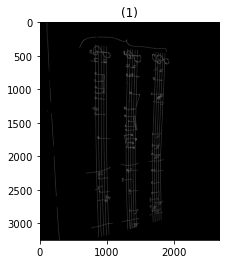

89.00477777777776


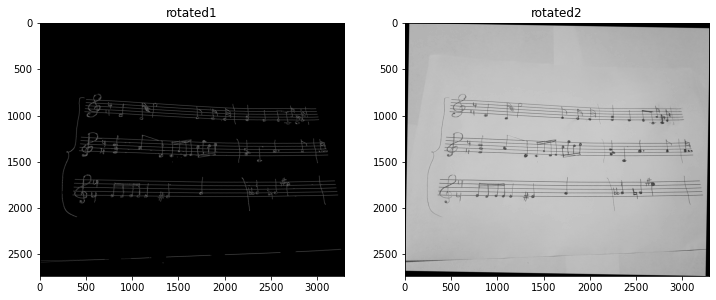

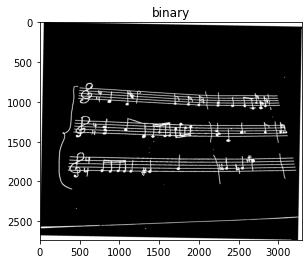

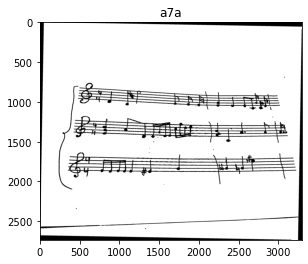

8 25
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(474, 5)


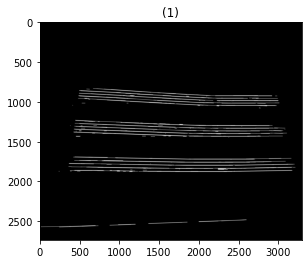

[[[ 668  831]]

 [[ 669  831]]

 [[ 670  831]]

 ...

 [[ 254 2574]]

 [[ 255 2574]]

 [[ 256 2574]]]
(350645, 1, 2)


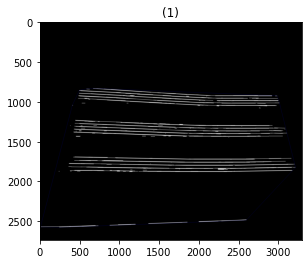

(8, 2)


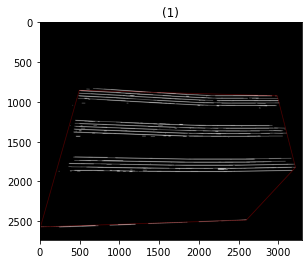

TypeError: 'numpy.int64' object is not callable

In [13]:
# images, files = load_images_from_folder("../inputs/test-set-scanned/test-cases")
images, files = load_images_from_folder("../inputs/test-set-camera-captured/test-cases")
images = [images[1]]
files = [files[0]]
outpath = "../outputs/"
for image, file in zip(images, files):
    # binary = segm(image)
    binary = cv2.Canny(image, 50, 200, None, 3)
    show_images([binary])
    binaryDeskewed, deskewed = deskew(binary, image)
    bimg = 255 - segm(deskewed)
    thickness, distance = get_lengthes(bimg)
    fimg, candidates = get_candidates_lines(bimg, thickness)
    show_images([fimg], ["a"])
    
    print(thickness, distance)
    print(binaryDeskewed)
    linesOnly = drawLinesOnly(binaryDeskewed)
    fixed = fix_perspective(linesOnly, deskewed)
    # horz_proj(fixed, file)
    # show_images(fixed)
    show_images([image, fixed], [file, "fixed"])
    # for i, im in enumerate(fixed):
    #     name = file.split('.')
    #     name[0] += '_' + str(i)
    #     cv2.imwrite(outpath + ".".join(name), im)

fixed = fix_perspective(linesOnly, deskewed)

drawLinesOnly(fixed1)

show_images([image, fixed1, fixed2, fixed], [file, "fixed1", "fixed2", "fixed"])